## Monitoring convergence of scaling computation

In [1]:
import uproot

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import json
import yaml
from glob import glob
import os
import sys
from pathlib import Path
from collections import defaultdict

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sns.set_theme(context='notebook', font='sans-serif', style='white', palette=None, font_scale=1.5,
              rc={"lines.linewidth": 2.5, "font.sans-serif": 'DejaVu Sans'})
# sns.set_palette('muted') # deep, muted, bright, pastel, dark, colorblind

In [4]:
PATH = Path('../..')
module_path = os.path.abspath(PATH)
if module_path not in sys.path:
    sys.path.append(module_path)

### read feature to be plotted

In [5]:
with open(PATH/'configs/training_v1.yaml') as f:
    scaling_dict = yaml.safe_load(f)

In [6]:
# scaling json doesn't store scaling_type, so read it from the scaling cfg
normal_features = defaultdict(list) # interested only in scaling type "normal", where means/stds were computed
for var_type, var_list in scaling_dict['Features_all'].items():
    for var_dict in var_list:
        var_name = list(var_dict.keys())[0]
        if var_dict[var_name][2] == 'normal':
            normal_features[var_type].append(var_name)
var_types = list(normal_features.keys())

In [7]:
# normal_features

### load scaling snapshots

In [8]:
N_FILES_PER_STEP = 10 # as it was set while running the scaling computation
path_to_snapshots = '/afs/cern.ch/work/o/ofilatov/public/scaling_v1/TauFlat' # scaling params only for TauFlat variables with processing all Shuffle&Merge files 
version = 'v1_tau'

# N_FILES_PER_STEP = 1
# path_to_snapshots = '/afs/cern.ch/work/o/ofilatov/public/output_json_v1/all_var_types' # scaling params for all var_types all variables with processing 5 first Shuffle&Merge files 
# version = 'v1'

In [9]:
n_snapshots = len(glob(f'{path_to_snapshots}/scaling_params_{version}_log_*.json'))
sorted_file_names = [f'{path_to_snapshots}/scaling_params_{version}_log_{i}.json' for i in range(n_snapshots)]
sorted_file_names += [f'{path_to_snapshots}/scaling_params_{version}.json'] # append final snapshot to the end
sorted_file_names

['/afs/cern.ch/work/o/ofilatov/public/scaling_v1/TauFlat/scaling_params_v1_tau_log_0.json',
 '/afs/cern.ch/work/o/ofilatov/public/scaling_v1/TauFlat/scaling_params_v1_tau_log_1.json',
 '/afs/cern.ch/work/o/ofilatov/public/scaling_v1/TauFlat/scaling_params_v1_tau_log_2.json',
 '/afs/cern.ch/work/o/ofilatov/public/scaling_v1/TauFlat/scaling_params_v1_tau_log_3.json',
 '/afs/cern.ch/work/o/ofilatov/public/scaling_v1/TauFlat/scaling_params_v1_tau_log_4.json',
 '/afs/cern.ch/work/o/ofilatov/public/scaling_v1/TauFlat/scaling_params_v1_tau_log_5.json',
 '/afs/cern.ch/work/o/ofilatov/public/scaling_v1/TauFlat/scaling_params_v1_tau_log_6.json',
 '/afs/cern.ch/work/o/ofilatov/public/scaling_v1/TauFlat/scaling_params_v1_tau_log_7.json',
 '/afs/cern.ch/work/o/ofilatov/public/scaling_v1/TauFlat/scaling_params_v1_tau_log_8.json',
 '/afs/cern.ch/work/o/ofilatov/public/scaling_v1/TauFlat/scaling_params_v1_tau_log_9.json',
 '/afs/cern.ch/work/o/ofilatov/public/scaling_v1/TauFlat/scaling_params_v1_tau_l

### read into DataFrame

In [10]:
from python.plot_scaling_convergence import read_params_to_df

In [11]:
CONE_TYPE = 'global'
VAR_TYPE = 'TauFlat'

In [12]:
df_mean_dict, df_std_dict = read_params_to_df(sorted_file_names, CONE_TYPE, normal_features)
df_mean = df_mean_dict[VAR_TYPE]
df_std = df_std_dict[VAR_TYPE]
if len(df_mean.columns)==0 and len(df_std.columns)==0:
    raise Exception(f"found no variables with scaling type: 'normal', cone type {CONE_TYPE}: '{VAR_TYPE}'")

In [13]:
df_mean

,tau_mass,tau_E_over_pt,tau_chargedIsoPtSum,tau_footprintCorrection,tau_neutralIsoPtSum,tau_photonPtSumOutsideSignalCone,tau_puCorrPtSum,tau_dxy,tau_dxy_sig,tau_ip3d,...,tau_dz,tau_dz_sig,tau_flightLength_x,tau_flightLength_y,tau_flightLength_z,tau_flightLength_sig,tau_pt_weighted_dr_signal,tau_leadingTrackNormChi2,tau_n_photons,tau_leadChargedCand_etaAtEcalEntrance_minus_tau_eta
0,0.5529,3.1,15.15,2.180,11.76,1.187,22.16,0.002237,2.315,0.002990,...,0.000079,20.01,-0.001009,-0.000133,-0.002394,-5.667,0.007254,1.713,2.320,0.000170
1,0.5546,3.1,15.53,2.193,12.44,1.203,22.17,0.002244,2.340,0.003049,...,-0.000048,17.54,-0.000870,-0.000087,-0.000556,-5.634,0.007317,1.713,2.300,0.000208
2,0.5546,3.1,15.41,2.192,12.32,1.205,22.16,0.002245,2.339,0.003051,...,0.000109,17.94,-0.000632,-0.000205,-0.000709,-5.629,0.007337,1.713,2.296,0.000220
3,0.5551,3.1,15.67,2.208,12.61,1.207,22.17,0.002248,2.343,0.003054,...,0.000137,17.37,-0.000677,-0.000164,-0.000654,-5.620,0.007337,1.713,2.306,0.000214
4,0.5552,3.1,15.63,2.213,12.59,1.207,22.17,0.002245,2.340,0.003049,...,0.000075,17.30,-0.000692,-0.000153,-0.000698,-5.623,0.007327,1.713,2.305,0.000210
5,0.5551,3.1,15.58,2.213,12.53,1.206,22.17,0.002242,2.338,0.003042,...,0.000080,17.28,-0.000690,-0.000147,-0.000656,-5.627,0.007316,1.712,2.305,0.000214
6,0.5549,3.1,15.49,2.205,12.40,1.205,22.16,0.002241,2.337,0.003043,...,0.000118,17.40,-0.000703,-0.000111,-0.000753,-5.630,0.007313,1.712,2.302,0.000210
7,0.5549,3.1,15.46,2.201,12.38,1.206,22.16,0.002245,2.339,0.003047,...,0.000066,17.57,-0.000775,-0.000129,-0.000771,-5.626,0.007317,1.711,2.300,0.000208
8,0.5549,3.1,15.40,2.196,12.32,1.206,22.16,0.002246,2.339,0.003050,...,0.000035,17.60,-0.000788,-0.000121,-0.000686,-5.625,0.007321,1.712,2.298,0.000207
9,0.5548,3.1,15.33,2.192,12.25,1.205,22.16,0.002247,2.340,0.003052,...,0.000050,17.54,-0.000775,-0.000145,-0.000699,-5.624,0.007323,1.712,2.296,0.000204


In [14]:
df_std

,tau_mass,tau_E_over_pt,tau_chargedIsoPtSum,tau_footprintCorrection,tau_neutralIsoPtSum,tau_photonPtSumOutsideSignalCone,tau_puCorrPtSum,tau_dxy,tau_dxy_sig,tau_ip3d,...,tau_dz,tau_dz_sig,tau_flightLength_x,tau_flightLength_y,tau_flightLength_z,tau_flightLength_sig,tau_pt_weighted_dr_signal,tau_leadingTrackNormChi2,tau_n_photons,tau_leadChargedCand_etaAtEcalEntrance_minus_tau_eta
0,0.5362,2.1,39.50,6.616,39.94,3.821,13.02,0.009857,4.226,0.01333,...,0.5022,217.7,0.3863,0.3821,1.072,8.700,0.01853,5.189,3.065,0.03668
1,0.5375,2.1,45.71,7.025,49.18,3.847,13.29,0.009905,4.277,0.01477,...,0.4633,199.5,0.3911,0.3954,1.104,8.776,0.01858,5.198,3.036,0.03735
2,0.5369,2.1,45.47,7.035,49.28,3.848,13.15,0.009905,4.277,0.01444,...,0.4693,202.7,0.3907,0.3929,1.098,8.795,0.01861,5.204,3.039,0.03728
3,0.5374,2.1,46.56,7.145,50.62,3.870,13.32,0.009911,4.281,0.01422,...,0.4602,198.6,0.3944,0.3964,1.113,8.812,0.01862,5.202,3.047,0.03735
4,0.5375,2.1,46.68,7.225,51.33,3.882,13.29,0.009895,4.274,0.01404,...,0.4596,198.3,0.3933,0.3971,1.111,8.797,0.01861,5.197,3.044,0.03724
5,0.5374,2.1,46.19,7.200,50.63,3.883,13.24,0.009885,4.270,0.01391,...,0.4595,198.1,0.3920,0.3959,1.107,8.787,0.01859,5.198,3.042,0.03709
6,0.5373,2.1,45.50,7.137,49.47,3.878,13.17,0.009883,4.267,0.01385,...,0.4617,199.2,0.3909,0.3947,1.103,8.785,0.01859,5.195,3.038,0.03720
7,0.5373,2.1,45.62,7.129,49.73,3.884,13.18,0.009892,4.272,0.01385,...,0.4644,200.5,0.3910,0.3946,1.102,8.798,0.01859,5.192,3.036,0.03722
8,0.5374,2.1,45.43,7.104,49.44,3.876,13.15,0.009892,4.273,0.01393,...,0.4649,200.8,0.3909,0.3940,1.101,8.804,0.01859,5.193,3.034,0.03732
9,0.5373,2.1,45.20,7.085,49.28,3.874,13.13,0.009895,4.275,0.01389,...,0.4638,200.4,0.3910,0.3946,1.102,8.810,0.01859,5.193,3.031,0.03725


### compute running diffs

In [15]:
print('mean: ')
print('  NaN columns: ', list(df_mean.columns[df_mean.isna().any()]))
print('  inf columns: ', list(df_mean.columns[np.isinf(df_mean).any()]))

print('\nstd: ')
print('  NaN columns: ', list(df_std.columns[df_std.isna().any()]))
print('  inf columns: ', list(df_std.columns[np.isinf(df_std).any()]))

mean: 
  NaN columns:  []
  inf columns:  []

std: 
  NaN columns:  []
  inf columns:  []


In [16]:
not_inf_columns = list(df_mean.columns[~np.isinf(df_mean).any()])
df_mean = df_mean[not_inf_columns].dropna(axis=1, how='any')
if np.any(np.isinf(df_mean)) > 0:
    print("Found columns with inf in df_mean: ", df_mean.columns[np.isinf(df_mean)])

In [17]:
not_inf_columns = list(df_std.columns[~np.isinf(df_std).any()])
df_std = df_std[not_inf_columns].dropna(axis=1, how='any')
if np.any(np.isinf(df_std)) > 0:
    print("Found columns with inf in df_std: ", df_std.columns[np.isinf(df_std)])

In [18]:
# running diffs = difference of mean/std value between two consecutive snapshots, normalised by the value
running_diff_mean = abs(df_mean.iloc[1:].values - (df_mean.iloc[0:-1].values)) / abs(df_mean.iloc[0:-1])
running_diff_std = abs(df_std.iloc[1:].values - (df_std.iloc[0:-1].values)) / abs(df_std.iloc[0:-1])

In [19]:
# append to the end difference between 1st and final snapshots
running_diff_mean.iloc[-1] = abs(df_mean.iloc[-1].values - (df_mean.iloc[0].values)) / abs(df_mean.iloc[0])
running_diff_std.iloc[-1] = abs(df_std.iloc[-1].values - (df_std.iloc[0].values)) / abs(df_std.iloc[0])

### plot

In [20]:
from python.plot_scaling_convergence import plot_running_diff

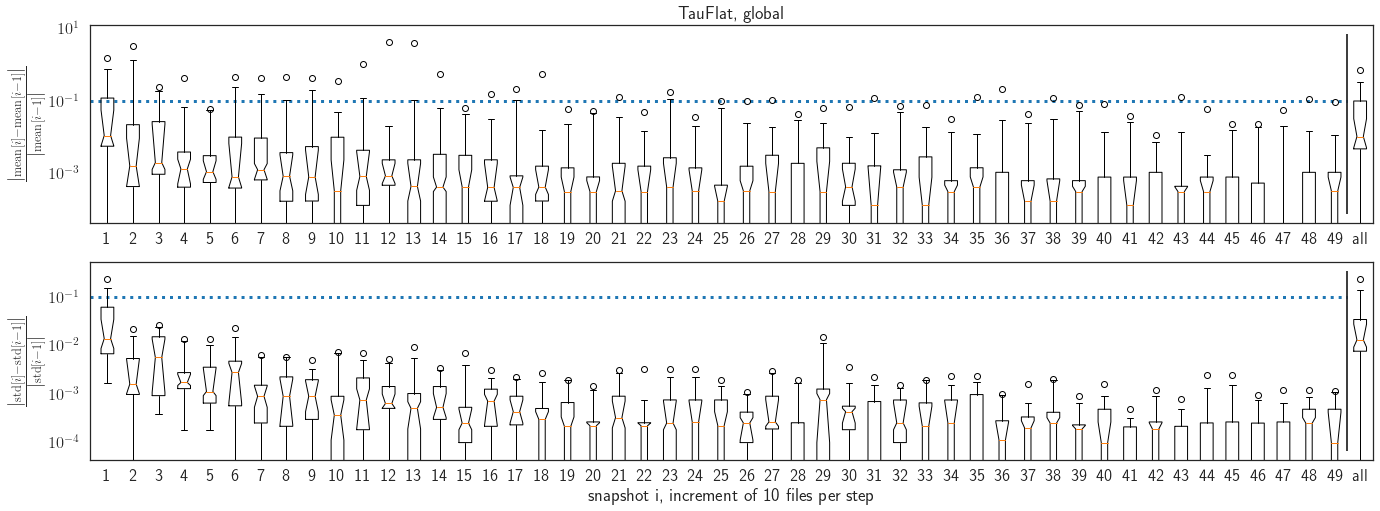

In [21]:
plot_running_diff(running_diff_mean, running_diff_std, N_FILES_PER_STEP, VAR_TYPE, CONE_TYPE, 
                  savepath=None, close_plot=False
                 )

## Quantile validation 

### open scaling & quantile files

In [22]:
path_to_params = '/afs/cern.ch/work/o/ofilatov/public/scaling_v1/all_var_types'
file_id = 0 # file id for which quantile ranges will be fetched

In [23]:
with open(PATH/'configs/training_v1.yaml', 'r') as f:
    training_cfg = yaml.safe_load(f)

In [24]:
with open(f'{path_to_params}/quantile_params_v1_fid_{file_id}.json', 'r') as f:
    quantile_params = json.load(f)

In [25]:
with open(f'{path_to_params}/scaling_params_v1.json', 'r') as f:
    scaling_params = json.load(f)

### read params & construct ranges

In [26]:
var_type = 'PfCand_chHad'
var_name = 'pfCand_chHad_rel_pt'
cone_type = 'inner'

In [27]:
for var_dict in training_cfg['Features_all'][var_type]:
    if var_name in var_dict.keys():
        var_scaling_type = var_dict[var_name][2]
        break
var_scaling_type

'normal'

In [28]:
var_quantiles = quantile_params[var_type][var_name][cone_type][str(file_id)]
var_scaling = scaling_params[var_type][var_name][cone_type]

In [29]:
var_quantiles

{'median': 0.14204025268554688,
 'min': 0.0001892082509584725,
 'max': 40.45664596557617,
 '1sigma': {'left': 0.018905488497260217, 'right': 0.4383216648439078},
 '2sigma': {'left': 0.004777174615367081, 'right': 0.9023162237998543},
 '3sigma': {'left': 0.0013282460580801856, 'right': 2.802788207197464},
 '5sigma': {'left': 0.00020081878574952264, 'right': 37.06446569468059}}

In [30]:
var_scaling

{'mean': 0.2296, 'std': 0.3576, 'lim_min': -5, 'lim_max': 5}

In [31]:
### fetch clamping params
mean = var_scaling['mean']
clamp_range_left = mean + var_scaling['lim_min']*var_scaling['std']
clamp_range_right = mean + var_scaling['lim_max']*var_scaling['std']
clamp_range = [clamp_range_left, clamp_range_right]

### fetch quantiles
median = var_quantiles['median']
min_value = var_quantiles['min']
max_value = var_quantiles['max']
#
one_sigma_left = var_quantiles['1sigma']['left']
one_sigma_right = var_quantiles['1sigma']['right']
one_sigma_range = [one_sigma_left, one_sigma_right]
#
two_sigma_left = var_quantiles['2sigma']['left']
two_sigma_right = var_quantiles['2sigma']['right']
two_sigma_range = [two_sigma_left, two_sigma_right]
#
three_sigma_left = var_quantiles['3sigma']['left']
three_sigma_right = var_quantiles['3sigma']['right']
three_sigma_range = [three_sigma_left, three_sigma_right]

### define suspicious criteria

In [32]:
suspicious_dict = {}
suspicious_dict['left_out'] = clamp_range_left > two_sigma_left
suspicious_dict['right_out'] = clamp_range_right < two_sigma_right
suspicious_dict['one_sigma_empty'] = one_sigma_left == one_sigma_right
suspicious_dict['two_sigma_empty'] = two_sigma_left == two_sigma_right
suspicious_dict['three_sigma_empty'] = three_sigma_left == three_sigma_right

### plot

In [33]:
from python.plot_quantile_ranges import plot_ranges

In [34]:
### cosmetics
xscale = clamp_range_right - clamp_range_left
yscale = 1
level_quantile = 0
level_clamp = level_quantile+3*yscale
bar_height = 1.5*yscale
xlim = [mean-.9*xscale, mean+1.*xscale]
ylim = [level_quantile-2*yscale, level_clamp+13.*yscale]

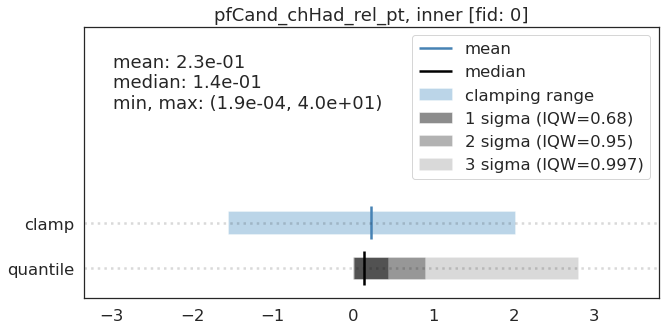

In [35]:
plt.rcParams['text.usetex'] = False 
plot_ranges(file_id, var_name, cone_type, None if var_scaling_type=='linear' else mean, median, min_value, max_value,
                                clamp_range, one_sigma_range, two_sigma_range, three_sigma_range,
                                suspicious_dict=suspicious_dict, savepath=None, close_plot=False)